In [10]:
%matplotlib inline
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy.optimize import minimize

Text(0, 0.5, 'VWAP')

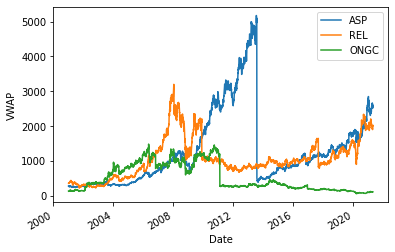

In [11]:
# To read csv files into Pandas Dataframes
ASP  = pd.read_csv('ASIANPAINT.csv')
REL  = pd.read_csv('RELIANCE.csv')
ONGC = pd.read_csv('ONGC.csv')
ASP['Date'] = pd.to_datetime(ASP['Date'])
REL['Date'] = pd.to_datetime(REL['Date'])
ONGC['Date'] = pd.to_datetime(ONGC['Date'])

# This sets the index of Pandas Dataframe to Dates
ASP.set_index('Date', inplace = True)
REL.set_index('Date', inplace = True)
ONGC.set_index('Date', inplace = True)

# This would rename the VWAP of the each dataframe to respective stock names so that each column name is unique.
ASP = ASP.rename(columns = {'VWAP': 'ASP'})
REL = REL.rename(columns = {'VWAP': 'REL'})
ONGC = ONGC.rename(columns = {'VWAP': 'ONGC'})

# To set the range in which we want to analyse
date_range = pd.date_range('2001-01-03', '2021-04-30')
df = pd.DataFrame(index = date_range)
                  
# Inner joining the dataframes for common date entries to get a single combined dataframe
df = df.join(ASP['ASP'], how = 'inner')
df = df.join(REL['REL'], how = 'inner')
df = df.join(ONGC['ONGC'], how = 'inner')

# Plotting the obtained dataframe
pt = df.plot()
pt.set_xlabel('Date')
pt.set_ylabel('VWAP')

In [53]:
def exp_portfolio_ret(weight, data):
    data = data * weight
    val = data.sum(axis = 1)
    val  = val[-1]
    return -val

# Risk-free rate of return = 5.5%
rfr=0.055

def sharpe_val(weight, data):
    data = data * weight
    values = data.sum(axis = 1)
    daily_ret = values.pct_change().to_numpy()
    daily_ret = daily_ret[1:]
    return -(np.mean(daily_ret)-rfr) / np.std(daily_ret)

# Defining the constraint function
def constraint(weight):
    return np.sum(weight) - 1

# Sets range for weights given to each asset 30% to 100%.
bounds = ( (0.3,1), (0.3,1), (0.3,1))

In [54]:
# To set random weights to each asset initially
weight = [0.3, 0.3, 0.3]

# Defining the constraint type (equality and function)
cons = {'type':'eq', 'fun': constraint}

# Displaying the optimum weights
print(minimize(sharpe_val, weight, args = df, bounds = bounds, constraints = cons))


     fun: 2.975888600118704
     jac: array([ 0.25365996,  0.01209778, -0.19931832])
 message: 'Optimization terminated successfully'
    nfev: 12
     nit: 3
    njev: 3
  status: 0
 success: True
       x: array([0.3, 0.3, 0.4])
